## 对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据？

#### 思路：重新构造一个全为0的数组，列名为分类，如果某一条数据中分类出现过，就让0变为1

In [26]:
import pandas as pd
import numpy as np

In [27]:
file_path = './IMDB-Movie-Data.csv'

In [28]:
df = pd.read_csv(file_path)


In [29]:
print(df['Genre'])

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
995         Crime,Drama,Mystery
996                      Horror
997         Drama,Music,Romance
998            Adventure,Comedy
999       Comedy,Family,Fantasy
Name: Genre, Length: 1000, dtype: object


In [30]:
#获取去重后的分类
temp_genre_data = df['Genre'].str.split(',').tolist()
genre_data = list(set([i for j in temp_genre_data for i in j]))
print(genre_data)

['Romance', 'Musical', 'History', 'Animation', 'Sci-Fi', 'Fantasy', 'Adventure', 'Mystery', 'War', 'Music', 'Family', 'Western', 'Action', 'Comedy', 'Biography', 'Horror', 'Drama', 'Crime', 'Sport', 'Thriller']


In [38]:
# 构造全为0的数组
zeros_df = pd.DataFrame(np.zeros((df.shape[0],len(genre_data))),columns = genre_data)
# print(zero_df)
#给每个电影出现分类的位置赋值1
for i in range(df.shape[0]):
    zeros_df.loc[i,temp_genre_data[i]] = 1
print(zeros_df)

     Romance  Musical  History  Animation  Sci-Fi  Fantasy  Adventure  \
0        0.0      0.0      0.0        0.0     1.0      0.0        1.0   
1        0.0      0.0      0.0        0.0     1.0      0.0        1.0   
2        0.0      0.0      0.0        0.0     0.0      0.0        0.0   
3        0.0      0.0      0.0        1.0     0.0      0.0        0.0   
4        0.0      0.0      0.0        0.0     0.0      1.0        1.0   
..       ...      ...      ...        ...     ...      ...        ...   
995      0.0      0.0      0.0        0.0     0.0      0.0        0.0   
996      0.0      0.0      0.0        0.0     0.0      0.0        0.0   
997      1.0      0.0      0.0        0.0     0.0      0.0        0.0   
998      0.0      0.0      0.0        0.0     0.0      0.0        1.0   
999      0.0      0.0      0.0        0.0     0.0      1.0        0.0   

     Mystery  War  Music  Family  Western  Action  Comedy  Biography  Horror  \
0        0.0  0.0    0.0     0.0      0.0  

In [40]:
#统计每个分类的电影的数量和
genre_count = zeros_df.sum(axis = 0)
#排序
genre_count = genre_count.sort_values()
print(genre_count)

Musical        5.0
Western        7.0
War           13.0
Music         16.0
Sport         18.0
History       29.0
Animation     49.0
Family        51.0
Biography     81.0
Fantasy      101.0
Mystery      106.0
Horror       119.0
Sci-Fi       120.0
Romance      141.0
Crime        150.0
Thriller     195.0
Adventure    259.0
Comedy       279.0
Action       303.0
Drama        513.0
dtype: float64


### 画图

In [42]:
from matplotlib import pyplot as plt

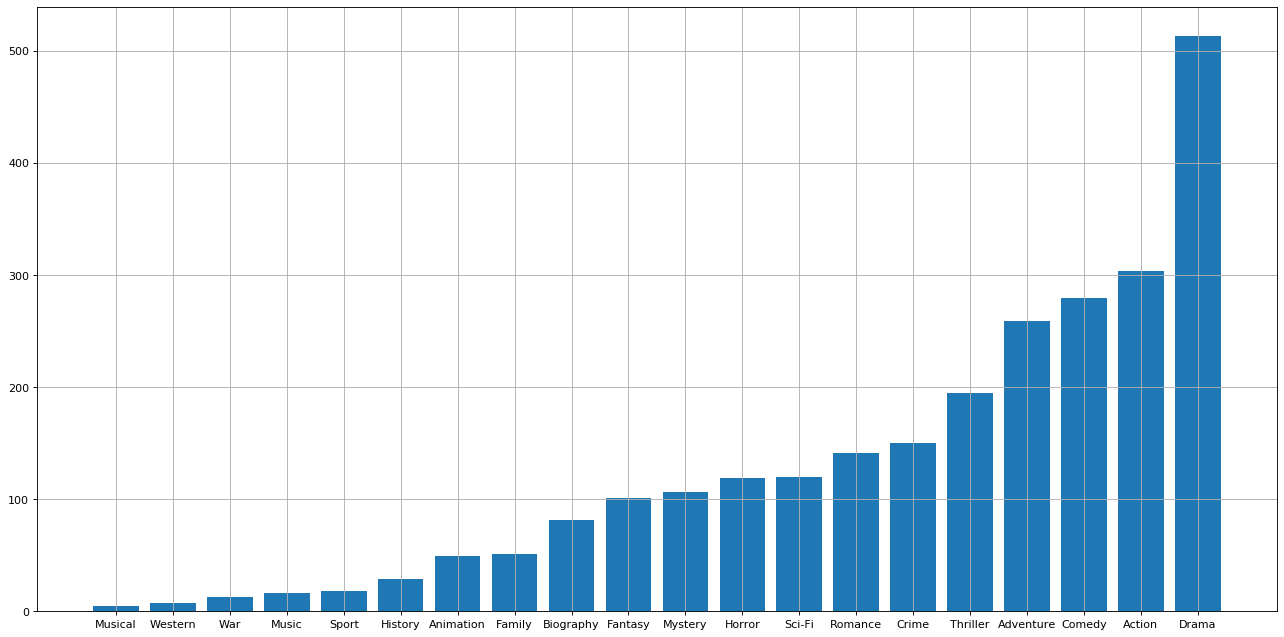

In [44]:
_x = genre_count.index
_y = genre_count.values

plt.figure(figsize=(20,10),dpi = 80)
plt.bar(range(len(_x)),_y)
#调整x轴
plt.xticks(range(len(_x)),_x)
plt.grid()
plt.show()